地学数据三维可视化课件第七节：Mayavi&ParaView

# <center>地学数据三维可视化-Mayavi&ParaView</center>
<br/>

<center><img src="./fig/ParaView-MoshaFault.gif" style="float: center; height:200px" /><center>
<br/>

<div style="clear: both"></div>
<center>汪宇锋</center>
<div style="clear: both"></div>
<center>地球物理与空间信息学院</center>
<div style="clear: both"></div>
<center>2021年11月</center>

## [What is ParaView?](https://www.paraview.org/)

- An open-source, scalable, multi-platform visualization application.
- Support for distributed computation models to process large data sets.
- An open, flexible, and intuitive user interface.
- An extensible, modular architecture based on open standards.
- A flexible BSD 3 Clause license
- Commercial maintenance and support.

<center><img src="./fig/scivis.png" style="float: center; height:600px" /><center>

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/Y1RATo2swM8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/wangyufeng/opt/anaconda3/envs/3dvis4geodata/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## [What is Mayavi2?](https://docs.enthought.com/mayavi/mayavi/overview.html#what-is-mayavi2)

<font size=6>

Mayavi2 is a general purpose, cross-platform tool for 3-D scientific data visualization. Its features include:
- Visualization of scalar, vector and tensor data in 2 and 3 dimensions.
- Easy scriptability using Python.
- Easy extendibility via custom sources, modules, and data filters.
- Reading several file formats: VTK (legacy and XML), PLOT3D, etc.
- Saving rendered visualization in a variety of image formats.
    </font>

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/qGyXbNKPXqI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [3]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/PFOd01fqcyQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Basic Visualization for Seismic Interpretation

<font size=6>
    
 * [python-geoprobe](https://github.com/joferkington/python-geoprobe) - It's pure python, and only depends on numpy, so installing should be as simple as ``pip install geoprobe``.
 
 * Because these examples are deliberately simplified, we're going to skip worrying about the display coordinate system and just work in "pixel" coordinates for everything.  The horizons have already been cropped to exactly match the extent of the volume we're working with.  Normally, there would be additional checks (because the horizon wouldn't exactly match), and we'd be working in inline/crossline or a "real-world" coordinate system.
</font>

In [4]:
import geoprobe

vol = geoprobe.volume('data/Volumes/example.vol')
vol.data # A memmapped, 3D numpy array of uint8's

memmap([[[127, 127, 127, ..., 120,  91, 102],
         [127, 127, 127, ..., 147, 122, 128],
         [127, 127, 127, ..., 148, 129, 113],
         ...,
         [127, 127, 127, ..., 157, 199, 201],
         [127, 127, 127, ..., 140, 198, 198],
         [127, 127, 127, ..., 120, 166, 159]],

        [[127, 127, 127, ..., 115,  91, 102],
         [127, 127, 127, ..., 139, 127, 125],
         [127, 127, 127, ..., 154, 135, 123],
         ...,
         [127, 127, 127, ..., 185, 187, 164],
         [127, 127, 127, ..., 189, 199, 195],
         [127, 127, 127, ..., 154, 199, 199]],

        [[127, 127, 127, ..., 104,  97, 119],
         [127, 127, 127, ..., 130, 123, 131],
         [127, 127, 127, ..., 149, 144, 132],
         ...,
         [127, 127, 127, ..., 201, 187, 145],
         [127, 127, 127, ..., 205, 205, 174],
         [127, 127, 127, ..., 169, 204, 204]],

        ...,

        [[127, 127, 127, ..., 121, 133, 164],
         [127, 127, 127, ..., 136, 161, 175],
         [127, 127

In [5]:
# Load the entire volume into memory
data = vol.load()
data # A 3D numpy array of uint8's

array([[[127, 127, 127, ..., 120,  91, 102],
        [127, 127, 127, ..., 147, 122, 128],
        [127, 127, 127, ..., 148, 129, 113],
        ...,
        [127, 127, 127, ..., 157, 199, 201],
        [127, 127, 127, ..., 140, 198, 198],
        [127, 127, 127, ..., 120, 166, 159]],

       [[127, 127, 127, ..., 115,  91, 102],
        [127, 127, 127, ..., 139, 127, 125],
        [127, 127, 127, ..., 154, 135, 123],
        ...,
        [127, 127, 127, ..., 185, 187, 164],
        [127, 127, 127, ..., 189, 199, 195],
        [127, 127, 127, ..., 154, 199, 199]],

       [[127, 127, 127, ..., 104,  97, 119],
        [127, 127, 127, ..., 130, 123, 131],
        [127, 127, 127, ..., 149, 144, 132],
        ...,
        [127, 127, 127, ..., 201, 187, 145],
        [127, 127, 127, ..., 205, 205, 174],
        [127, 127, 127, ..., 169, 204, 204]],

       ...,

       [[127, 127, 127, ..., 121, 133, 164],
        [127, 127, 127, ..., 136, 161, 175],
        [127, 127, 127, ..., 119, 158, 163

In [6]:
from mayavi import mlab

import geoprobe

vol = geoprobe.volume('data/Volumes/example.vol')
data = vol.load()

source = mlab.pipeline.scalar_field(data)
source.spacing = [1, 1, -1]

for axis in ['x', 'z']:
    plane = mlab.pipeline.image_plane_widget(source, 
                                    plane_orientation='{}_axes'.format(axis),
                                    slice_index=100, colormap='gray')
    # Flip colormap. Better way to do this?
    plane.module_manager.scalar_lut_manager.reverse_lut = True

mlab.outline()
mlab.show()

In [ ]:
from mayavi import mlab
import numpy as np
import geoprobe
import scipy.ndimage

hor = geoprobe.horizon('data/Horizons/channels.hzn')
vol = geoprobe.volume('data/Volumes/example.vol')
data = vol.load()

# Because we're not working in inline/crossline, convert to "pixel" coords.
z = hor.grid
z = vol.model2index(z, axis='z')

# Clip out some spikes and smooth the surface a bit...
z = scipy.ndimage.median_filter(z, 4)
z = scipy.ndimage.gaussian_filter(z, 1)

# Quirks due to the way hor.grid is defined...
mlab.surf(np.arange(z.shape[0]), np.arange(z.shape[1]), -z.T)

source = mlab.pipeline.scalar_field(data)
source.spacing = [1, 1, -1]

for axis in ['x', 'y']:
    plane = mlab.pipeline.image_plane_widget(source, 
                                    plane_orientation='{}_axes'.format(axis),
                                    slice_index=100, colormap='gray')
    plane.module_manager.scalar_lut_manager.reverse_lut = True

mlab.show()

## Extracting Attributes on a Surface

We'll use matplotlib for this and the rest of what we're doing because we want a simpler 2D display.

The key here is that we're just indexing the 3D array!  It's basically nearest-neighbor interpolation, but for our purposes here, that's perfect.

As it's currently set up, it will display amplitudes from the seismic volume.  Try changing things to use other attributes by changing which volume is being loaded (i.e. ``"coherence.vol"`` or ``"pseudo_coherence.vol"`` instead of ``"example.vol"``).

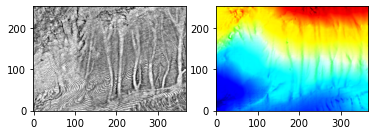

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import geoprobe

hor = geoprobe.horizon('data/Horizons/channels_smoothed.hzn')
vol = geoprobe.volume('data/Volumes/pseudo_coherence.vol')
data = vol.load()

# Extract volume attributes at each node in the horizon
i, j, k = vol.model2index(hor.x, hor.y, hor.z)
attr = data[i.astype(int), j.astype(int), k.astype(int)]

# Put unordered, but regularly spaced x, y, z back on a grid
attr_grid = geoprobe.horizon(hor.x, hor.y, attr).grid

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(attr_grid, cmap='gray', vmin=0, vmax=255)

# Show the "hillshaded" horizon
ls = LightSource(azdeg=315, altdeg=45)
axes[1].imshow(ls.shade(-hor.grid, plt.cm.jet))

for ax in axes:
    ax.invert_yaxis()

plt.show()


# 下节课预告
<br/>

<center class="half">
    <img src="./fig/sheldon-throw.gif" style="float: center; width:600px"/> 
</center>  